# 2015 Nigerian Presidential Election Result Analysis

## Introduction

Nigeria has 36 states and 1 FCT (Federal Capital Territory). The presidential election was convened within the 37 states of the country, see the map below.

The presidential election saw fourteen (14) candidates from fourteen (14) different parties contested for the office. The candidates were represented by thirteen (13) Male and one (1) female. The parties are as follow: AA, ACPN, AD, ADC, APA, APC, CPP, HOPE, KOWA, NCP, PDP, PPN, UDP and UPP. Below is the result table.

<img src='Img/Election result.png',width=600,height=600>

As we can see from the table above, the main parties that gathered massive votes are (APC and PDP). Thus, the dataset contain all the parties involved for the exploration.

The numeric values in the dataset are:-
1. No_of_Registered_Voters
2. Vote scored by each political party
3. No_of_Accredited_Voters
4. No_of_Valid_Votes
5. No_of_Rejected_Votes
6. Total_Votes_Cast
7. Population
8. No_of_LGA
9. Population_Rank

## Data Source

The data analyzed was gathered from the (INEC) official website. 

The data was downloaded in pdf, converted to csv for the analysis.

Pandas and matplotlib library of python programming packages are use to analyse the 2015 Presidential Election Result.

<img src='Img/img.png',width=600,height=600>

#### Main reasons of exploring the data
1. To find out the min and max votes for each parties.
2. To figure out if winning top states with highest population_rank and numbers of LGA, huge registered voters and total votes cast leads to the victory in the presidential election.
3. To check if "Number_of_Accredited_Voters" and "Number_of_Registered_Voters" are higher than "Population" in any state.
4. To check the APC "Margin_of_Victory_by_State" over PDP
5. Would like to see the state that voted most for the least party.


#### Import libraries and load in the dataset

In [1]:
# Import the packages
import pandas as pd
import matplotlib.pyplot as plt

# Enable plot to isplay inline within notebook
%matplotlib inline

In [2]:
election = pd.read_csv('datasets/2015 Nigerian Presidential Election Results.csv')

election.head()

,State,Code,No_of_Reg_ Voters,NO_of_Accr_Voters,AA,ACPN,AD,ADC,APA,APC,...,PDP,PPN,UDP,UPP,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
0,Abia,AB,1349134,442538,315,2194,448,569,2766,13394,...,368303,424,213,330,391045,10004,401049,2833999,17,28
1,Adamawa,AD,1518123,709993,495,1166,595,1012,1549,374701,...,251664,1163,289,334,636018,25192,661210,3168101,21,26
2,Akwa Ibom,AK,1644481,1074070,1600,443,474,608,386,58411,...,953304,327,224,144,1017054,11487,1028551,3920208,31,15
3,Anambra,AN,1963427,774430,547,1259,475,534,2303,17926,...,660762,537,286,1121,688584,14825,703409,4182032,21,10
4,Bauchi,BA,2053484,1094059,131,232,173,189,964,931598,...,86085,128,29,37,1020338,19437,1039775,4676465,20,7


#### Exploratory data analysis of the dataset

Each row corresponds to one state, the columns are features of the object.

Let’s have a look at data dimensionality, features names, and feature types.

In [3]:
election.shape

(37, 24)

From the output, we can see that the table contains 37 rows and 23 columns. 

Now let’s try see the column names using columns:

In [4]:
election.columns

Index(['State', 'Code', 'No_of_Reg_ Voters', 'NO_of_Accr_Voters', 'AA', 'ACPN',
       'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN',
       'UDP', 'UPP', 'No_of_Valid_Votes', 'No_of_Rejected_Votes',
       'Total_Votes_Cast', 'Population', 'No_of_LGA', 'Population_Rank'],
      dtype='object')

Let's use the info() method to output some general information about the dataframe:

In [5]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 24 columns):
State                   37 non-null object
Code                    37 non-null object
No_of_Reg_ Voters       37 non-null int64
NO_of_Accr_Voters       37 non-null int64
AA                      37 non-null int64
ACPN                    37 non-null int64
AD                      37 non-null int64
ADC                     37 non-null int64
APA                     37 non-null int64
APC                     37 non-null int64
CPP                     37 non-null int64
HOPE                    37 non-null int64
KOWA                    37 non-null int64
NCP                     37 non-null int64
PDP                     37 non-null int64
PPN                     37 non-null int64
UDP                     37 non-null int64
UPP                     37 non-null int64
No_of_Valid_Votes       37 non-null int64
No_of_Rejected_Votes    37 non-null int64
Total_Votes_Cast        37 non-null int64
Population   

int64, and object are the data types of the features. 2 features are of type object, and 22 features
are numeric. With this same method, we can easily see if there are any missing values. Here, there are
none because each column contains 37 observations, the same number of rows we saw before with shape.

###### The describe method :- 

Shows basic statistical characteristics of each numerical feature (int64 types): 
number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [6]:
election.describe()

,No_of_Reg_ Voters,NO_of_Accr_Voters,AA,ACPN,AD,ADC,APA,APC,CPP,HOPE,...,PDP,PPN,UDP,UPP,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
count,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,...,3.700000e+01,37.000000,37.000000,37.000000,3.700000e+01,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000
mean,1.821937e+06,8.549318e+05,589.864865,1089.432432,842.513514,801.783784,1447.000000,4.167276e+05,1008.108108,200.945946,...,3.473508e+05,661.486486,248.567568,489.729730,7.669304e+05,22824.837838,7.949206e+05,3.783880e+06,20.864865,19.000000
std,1.026236e+06,4.652298e+05,1060.585744,1537.170625,1189.481811,893.409143,994.530068,4.138469e+05,1016.533291,208.625388,...,3.160118e+05,781.031214,307.704543,999.370403,4.199694e+05,11468.557038,4.313679e+05,1.713420e+06,7.450437,10.824355
min,6.056370e+05,3.237390e+05,40.000000,38.000000,69.000000,105.000000,70.000000,5.194000e+03,44.000000,4.000000,...,2.552600e+04,52.000000,20.000000,29.000000,3.006910e+05,4672.000000,3.094450e+05,1.405201e+06,6.000000,1.000000
25%,1.349134e+06,5.201270e+05,145.000000,391.000000,279.000000,375.000000,674.000000,1.203310e+05,381.000000,83.000000,...,1.492220e+05,327.000000,79.000000,72.000000,4.737960e+05,14825.000000,4.917670e+05,2.833999e+06,17.000000,10.000000
50%,1.644481e+06,7.099930e+05,307.000000,536.000000,475.000000,539.000000,1165.000000,3.082900e+05,819.000000,144.000000,...,2.516640e+05,476.000000,184.000000,156.000000,6.360180e+05,19867.000000,6.612100e+05,3.423535e+06,20.000000,19.000000
75%,1.977211e+06,1.074070e+06,533.000000,1214.000000,757.000000,888.000000,2177.000000,5.678830e+05,1125.000000,255.000000,...,4.148630e+05,680.000000,286.000000,290.000000,9.823880e+05,29449.000000,1.000692e+06,4.182032e+06,25.000000,28.000000
max,5.827846e+06,2.361431e+06,6331.000000,8979.000000,6282.000000,5000.000000,4468.000000,1.903999e+06,5674.000000,989.000000,...,1.487075e+06,4339.000000,1623.000000,4859.000000,2.128821e+06,52289.000000,2.172447e+06,9.383682e+06,44.000000,37.000000


# Sorting


#### Five top states with the highest "No_of_Reg_Voters"

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort 
by No_of_Reg_Voters (use ascending=False to sort in descending order):

In [7]:
election.sort_values(by='No_of_Reg_ Voters', ascending=False).head()


,State,Code,No_of_Reg_ Voters,NO_of_Accr_Voters,AA,ACPN,AD,ADC,APA,APC,...,PDP,PPN,UDP,UPP,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
24,Lagos,LA,5827846,1678754,1795,3038,4453,2072,2177,792460,...,632327,1041,269,244,1443686,52289,1495975,9013534,20,2
19,Kano,KN,4943562,2361431,426,778,708,657,2770,1903999,...,215779,485,234,156,2128821,43626,2172447,9383682,44,1
18,Kaduna,KD,3361743,1740031,218,424,273,546,1611,1127760,...,484085,549,79,78,1517482,32719,1650201,6066562,23,3
20,Katsina,KT,2842741,1578646,183,402,783,498,1671,1345441,...,98937,254,117,72,1449426,32288,1481714,5792578,34,4
30,Oyo,OY,2344448,1073849,6331,8979,6282,5000,4468,528620,...,303376,2842,1069,3565,881352,47254,928606,5591589,33,5


###### Let's see the party that got the highest vote in the top state with highest 'No_of_Reg_Voters'

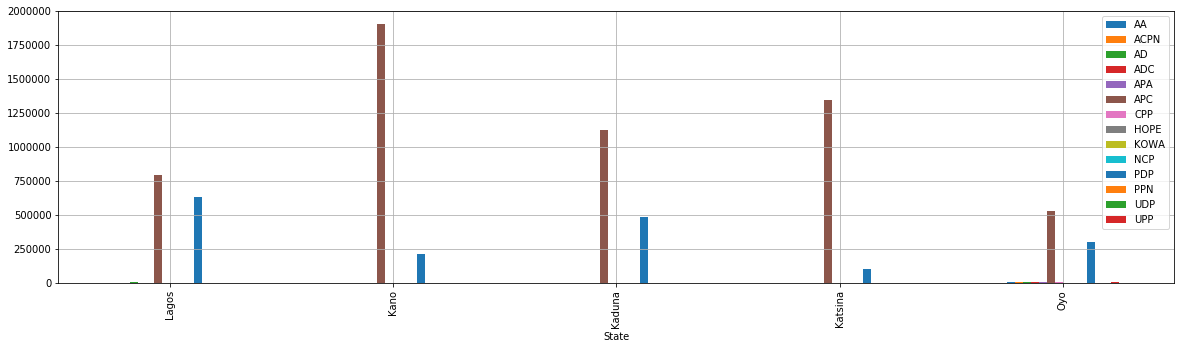

In [8]:
win = election.sort_values(by='No_of_Reg_ Voters', ascending=False).head()

win.plot(x='State', y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 
                                 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], figsize=(20, 5), kind='bar', grid=1)

###### Let's see the least five (5) states and the party won in those states sort by "No_of_Reg_Voters"

In [9]:
election.sort_values(by='No_of_Reg_ Voters', ascending=True).head()


,State,Code,No_of_Reg_ Voters,NO_of_Accr_Voters,AA,ACPN,AD,ADC,APA,APC,...,PDP,PPN,UDP,UPP,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
5,Bayelsa,BY,605637,384789,45,38,69,116,70,5194,...,361209,52,20,35,367067,4672,371739,1703358,8,36
12,Ekiti,EK,723255,323739,94,536,854,424,482,120331,...,176465,398,60,145,300691,8754,309445,2384212,16,29
14,Federal Capital Territory,FCT,886573,344056,139,342,240,288,674,146399,...,157195,269,95,96,305805,9210,316015,1405201,6,37
10,Ebonyi,EB,1071225,425301,426,1214,1133,2704,2452,19518,...,323653,1168,624,4859,363888,29449,393337,2173501,13,34
35,Yobe,YB,1077942,520127,101,164,213,112,632,446265,...,25526,101,30,32,473796,17971,491767,2321591,17,32


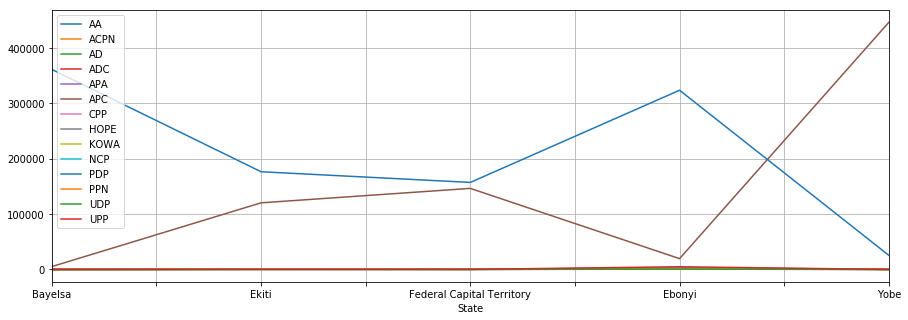

In [10]:
win_lowest = election.sort_values(by='No_of_Reg_ Voters', ascending=True).head()
win_lowest.plot(x='State', y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 
                                 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], figsize=(15, 5), kind='line', grid=1)

###### Let's see the party that got the highest vote among the top states with the highest "Total_Votes_Cast''

In [11]:
election.sort_values(by='Total_Votes_Cast', ascending=False).head()

,State,Code,No_of_Reg_ Voters,NO_of_Accr_Voters,AA,ACPN,AD,ADC,APA,APC,...,PDP,PPN,UDP,UPP,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
19,Kano,KN,4943562,2361431,426,778,708,657,2770,1903999,...,215779,485,234,156,2128821,43626,2172447,9383682,44,1
18,Kaduna,KD,3361743,1740031,218,424,273,546,1611,1127760,...,484085,549,79,78,1517482,32719,1650201,6066562,23,3
32,Rivers,RV,2324300,1643409,1066,525,1104,1031,513,69238,...,1487075,492,303,156,1555451,19307,1584758,5185400,23,6
24,Lagos,LA,5827846,1678754,1795,3038,4453,2072,2177,792460,...,632327,1041,269,244,1443686,52289,1495975,9013534,20,2
20,Katsina,KT,2842741,1578646,183,402,783,498,1671,1345441,...,98937,254,117,72,1449426,32288,1481714,5792578,34,4


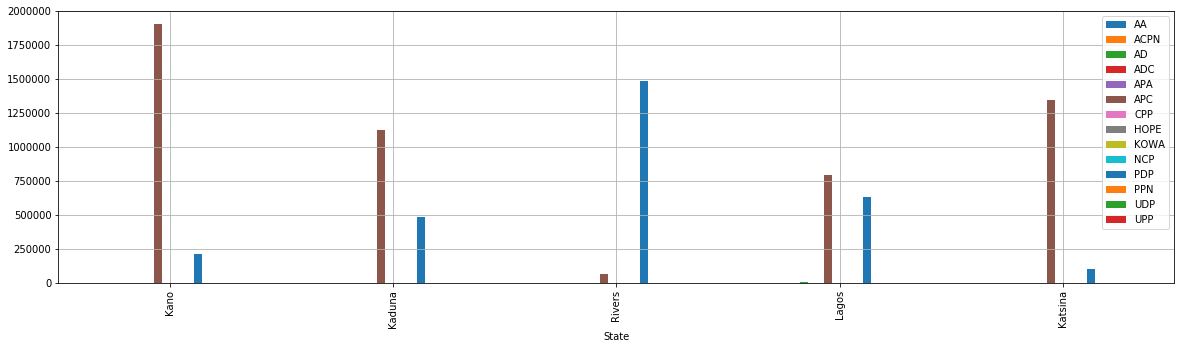

In [12]:
win2 = election.sort_values(by='Total_Votes_Cast', ascending=False).head()

win2.plot(x='State', y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 
                                 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], figsize=(20, 5), kind='bar', grid=2)

###### Let's combine ''Population_Rank'' and ''No_of_LGA'' to see which party trumph in that aspect


In [13]:
election.sort_values(by=['Population_Rank', 'No_of_LGA'], ascending=[True, False]).head()


,State,Code,No_of_Reg_ Voters,NO_of_Accr_Voters,AA,ACPN,AD,ADC,APA,APC,...,PDP,PPN,UDP,UPP,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
19,Kano,KN,4943562,2361431,426,778,708,657,2770,1903999,...,215779,485,234,156,2128821,43626,2172447,9383682,44,1
24,Lagos,LA,5827846,1678754,1795,3038,4453,2072,2177,792460,...,632327,1041,269,244,1443686,52289,1495975,9013534,20,2
18,Kaduna,KD,3361743,1740031,218,424,273,546,1611,1127760,...,484085,549,79,78,1517482,32719,1650201,6066562,23,3
20,Katsina,KT,2842741,1578646,183,402,783,498,1671,1345441,...,98937,254,117,72,1449426,32288,1481714,5792578,34,4
30,Oyo,OY,2344448,1073849,6331,8979,6282,5000,4468,528620,...,303376,2842,1069,3565,881352,47254,928606,5591589,33,5


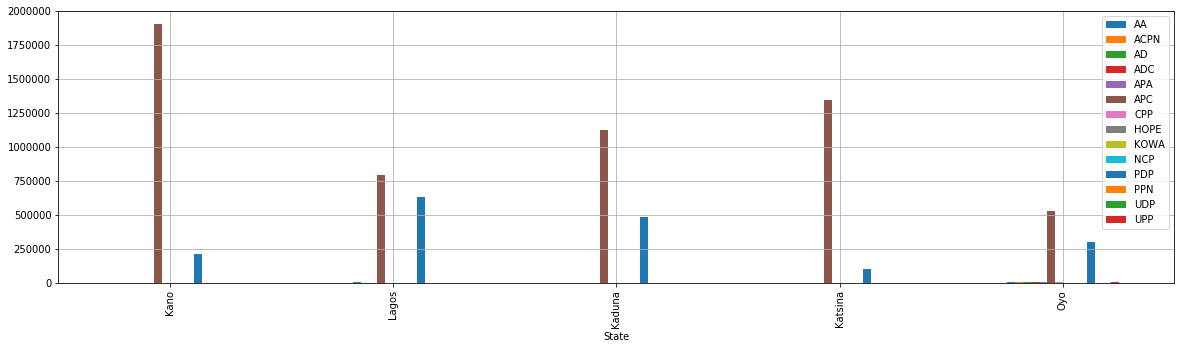

In [14]:
win3 = election.sort_values(by=['Population_Rank', 'No_of_LGA'], ascending=[True, False]).head()

win3.plot(x='State', y=['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 
                                 'KOWA', 'NCP', 'PDP', 'PPN', 'UDP', 'UPP'], figsize=(20, 5), kind='bar', grid=2)

### Turnout of Voters for the election

Let's divide the 'No_of_Reg_Voters' by 'Total_Votes_Cast' for each state to see the ratio of voters turnover

In [15]:
election['Turnout'] = election['Total_Votes_Cast'] / election['No_of_Reg_ Voters']

election[['State', "Turnout"]][:10]

,State,Turnout
0,Abia,0.297264
1,Adamawa,0.435544
2,Akwa Ibom,0.625456
3,Anambra,0.358256
4,Bauchi,0.506347
5,Bayelsa,0.613798
6,Benue,0.371320
7,Borno,0.286168
8,Cross River,0.407158
9,Delta,0.628481


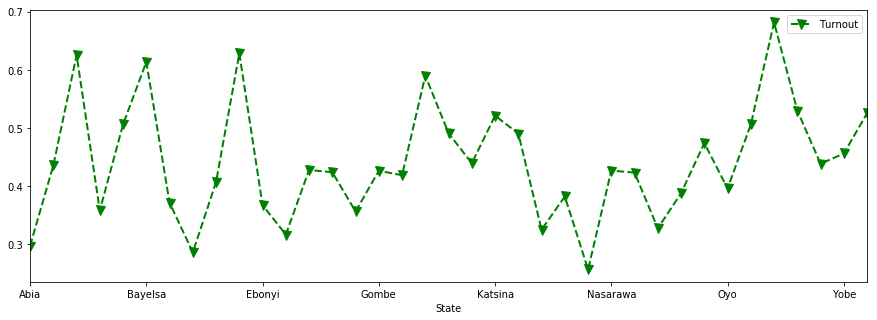

In [16]:
election.plot(x='State', y='Turnout', figsize=(15, 5), linestyle='dashed', color='green', marker='v',
              linewidth=2, markersize=9)

#### To work directly with voters data, let's pull out the data related excluding parties


1. Number_of_Registered_Voters
2. Number_of_Accredited_Voters
3. Number_of_Valid_Votes
4. Number_of_Rejected_Votes
5. Total_Votes_Cast
6. Population
7. Number_of_LGA
8. Population_Rank

In [17]:
voters_data = election[['State', 'No_of_Reg_ Voters', 'NO_of_Accr_Voters', 'No_of_Valid_Votes', 'No_of_Rejected_Votes', 
                        'Total_Votes_Cast', 'Population', 'No_of_LGA', 'Population_Rank']]

voters_data

,State,No_of_Reg_ Voters,NO_of_Accr_Voters,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
0,Abia,1349134,442538,391045,10004,401049,2833999,17,28
1,Adamawa,1518123,709993,636018,25192,661210,3168101,21,26
2,Akwa Ibom,1644481,1074070,1017054,11487,1028551,3920208,31,15
3,Anambra,1963427,774430,688584,14825,703409,4182032,21,10
4,Bauchi,2053484,1094059,1020338,19437,1039775,4676465,20,7
5,Bayelsa,605637,384789,367067,4672,371739,1703358,8,36
6,Benue,1893596,754634,683264,19867,703131,4219244,23,9
7,Borno,1799669,544759,501920,13088,515008,4151193,25,11
8,Cross River,1144288,500577,450514,15392,465906,2888966,18,27
9,Delta,2044372,1350914,1267773,17075,1284848,4098391,25,12


#### Summary statistics of voters_data

In [18]:
voters_data.describe()

,No_of_Reg_ Voters,NO_of_Accr_Voters,No_of_Valid_Votes,No_of_Rejected_Votes,Total_Votes_Cast,Population,No_of_LGA,Population_Rank
count,3.700000e+01,3.700000e+01,3.700000e+01,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000
mean,1.821937e+06,8.549318e+05,7.669304e+05,22824.837838,7.949206e+05,3.783880e+06,20.864865,19.000000
std,1.026236e+06,4.652298e+05,4.199694e+05,11468.557038,4.313679e+05,1.713420e+06,7.450437,10.824355
min,6.056370e+05,3.237390e+05,3.006910e+05,4672.000000,3.094450e+05,1.405201e+06,6.000000,1.000000
25%,1.349134e+06,5.201270e+05,4.737960e+05,14825.000000,4.917670e+05,2.833999e+06,17.000000,10.000000
50%,1.644481e+06,7.099930e+05,6.360180e+05,19867.000000,6.612100e+05,3.423535e+06,20.000000,19.000000
75%,1.977211e+06,1.074070e+06,9.823880e+05,29449.000000,1.000692e+06,4.182032e+06,25.000000,28.000000
max,5.827846e+06,2.361431e+06,2.128821e+06,52289.000000,2.172447e+06,9.383682e+06,44.000000,37.000000


#### Comparison betweeen "Number_of_Accredited_Voters" Vs "Number_of_Registered_Voters" Vs "Population"


Normally, we expect the "Population" to be higher than both "Number_of_Accredited_Voters" Vs "Number_of_Registered_Voters". Also, "Number_of_Registered_Voters" should be higher than "Number_of_Accredited_Voters". Let's explore the data to confirm if everything is right.


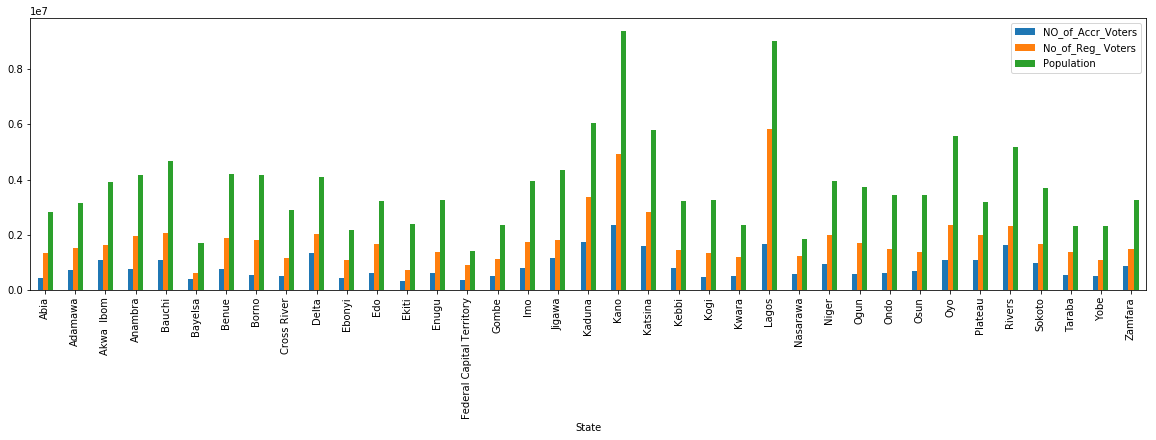

In [19]:
voters_data.plot(x='State', y=['NO_of_Accr_Voters', 'No_of_Reg_ Voters', 'Population'], kind='bar', figsize=(20, 5))

#### Let's extract the parties columns and perform some analysis on them.

In [20]:
parties_data = election[['State', 'AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN',
                         'UDP', 'UPP']]

parties_data

,State,AA,ACPN,AD,ADC,APA,APC,CPP,HOPE,KOWA,NCP,PDP,PPN,UDP,UPP
0,Abia,315,2194,448,569,2766,13394,1046,125,173,745,368303,424,213,330
1,Adamawa,495,1166,595,1012,1549,374701,819,267,752,1212,251664,1163,289,334
2,Akwa Ibom,1600,443,474,608,386,58411,412,192,160,381,953304,327,224,144
3,Anambra,547,1259,475,534,2303,17926,1279,357,311,887,660762,537,286,1121
4,Bauchi,131,232,173,189,964,931598,391,46,128,207,86085,128,29,37
5,Bayelsa,45,38,69,116,70,5194,44,18,52,95,361209,52,20,35
6,Benue,315,1464,254,539,945,373961,567,115,105,683,303737,439,66,74
7,Borno,145,243,392,201,878,473543,310,88,158,107,25640,143,31,41
8,Cross River,279,514,709,749,532,28368,381,237,312,930,414863,864,289,1487
9,Delta,1473,916,735,888,478,48910,813,166,311,670,1211405,393,354,261


#### Summary statistics of  parties_data

In [21]:
parties_data.describe()

,AA,ACPN,AD,ADC,APA,APC,CPP,HOPE,KOWA,NCP,PDP,PPN,UDP,UPP
count,37.000000,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000,37.000000,3.700000e+01,37.000000,37.000000,37.000000
mean,589.864865,1089.432432,842.513514,801.783784,1447.000000,4.167276e+05,1008.108108,200.945946,353.405405,660.945946,3.473508e+05,661.486486,248.567568,489.729730
std,1060.585744,1537.170625,1189.481811,893.409143,994.530068,4.138469e+05,1016.533291,208.625388,425.865489,418.460336,3.160118e+05,781.031214,307.704543,999.370403
min,40.000000,38.000000,69.000000,105.000000,70.000000,5.194000e+03,44.000000,4.000000,48.000000,95.000000,2.552600e+04,52.000000,20.000000,29.000000
25%,145.000000,391.000000,279.000000,375.000000,674.000000,1.203310e+05,381.000000,83.000000,153.000000,394.000000,1.492220e+05,327.000000,79.000000,72.000000
50%,307.000000,536.000000,475.000000,539.000000,1165.000000,3.082900e+05,819.000000,144.000000,203.000000,670.000000,2.516640e+05,476.000000,184.000000,156.000000
75%,533.000000,1214.000000,757.000000,888.000000,2177.000000,5.678830e+05,1125.000000,255.000000,312.000000,784.000000,4.148630e+05,680.000000,286.000000,290.000000
max,6331.000000,8979.000000,6282.000000,5000.000000,4468.000000,1.903999e+06,5674.000000,989.000000,2274.000000,1895.000000,1.487075e+06,4339.000000,1623.000000,4859.000000


#### Let's us calculate how much votes each party got

In [22]:
parties_sum = parties_data[['AA', 'ACPN', 'AD', 'ADC', 'APA', 'APC', 'CPP', 'HOPE', 'KOWA', 'NCP', 'PDP', 'PPN',
                         'UDP', 'UPP']].sum()

parties_sum

AA         21825
ACPN       40309
AD         31173
ADC        29666
APA        53539
APC     15418920
CPP        37300
HOPE        7435
KOWA       13076
NCP        24455
PDP     12851981
PPN        24475
UDP         9197
UPP        18120
dtype: int64

#### Visualize the total votes by party

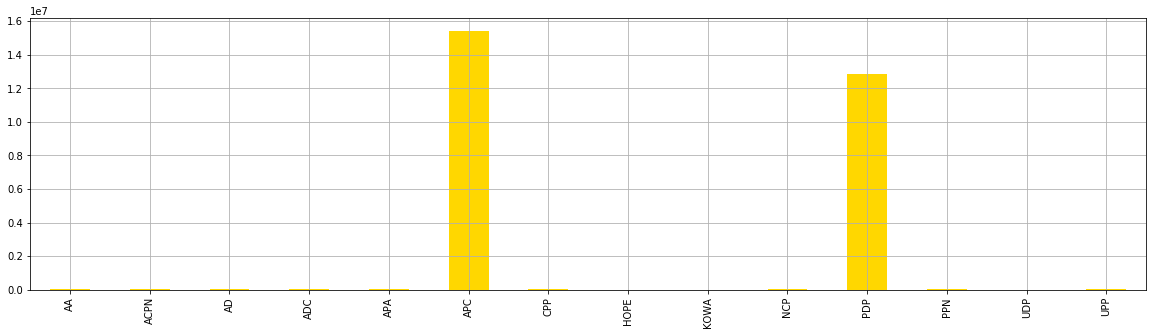

In [23]:
parties_sum.plot(kind='bar', figsize=(20, 5), grid=1, color='gold')

###### since "APC" and "PDP" parties aquired more votes than the others, let's explore these two parties further...


##### Visualize votes of "APC" and "PDP" by states

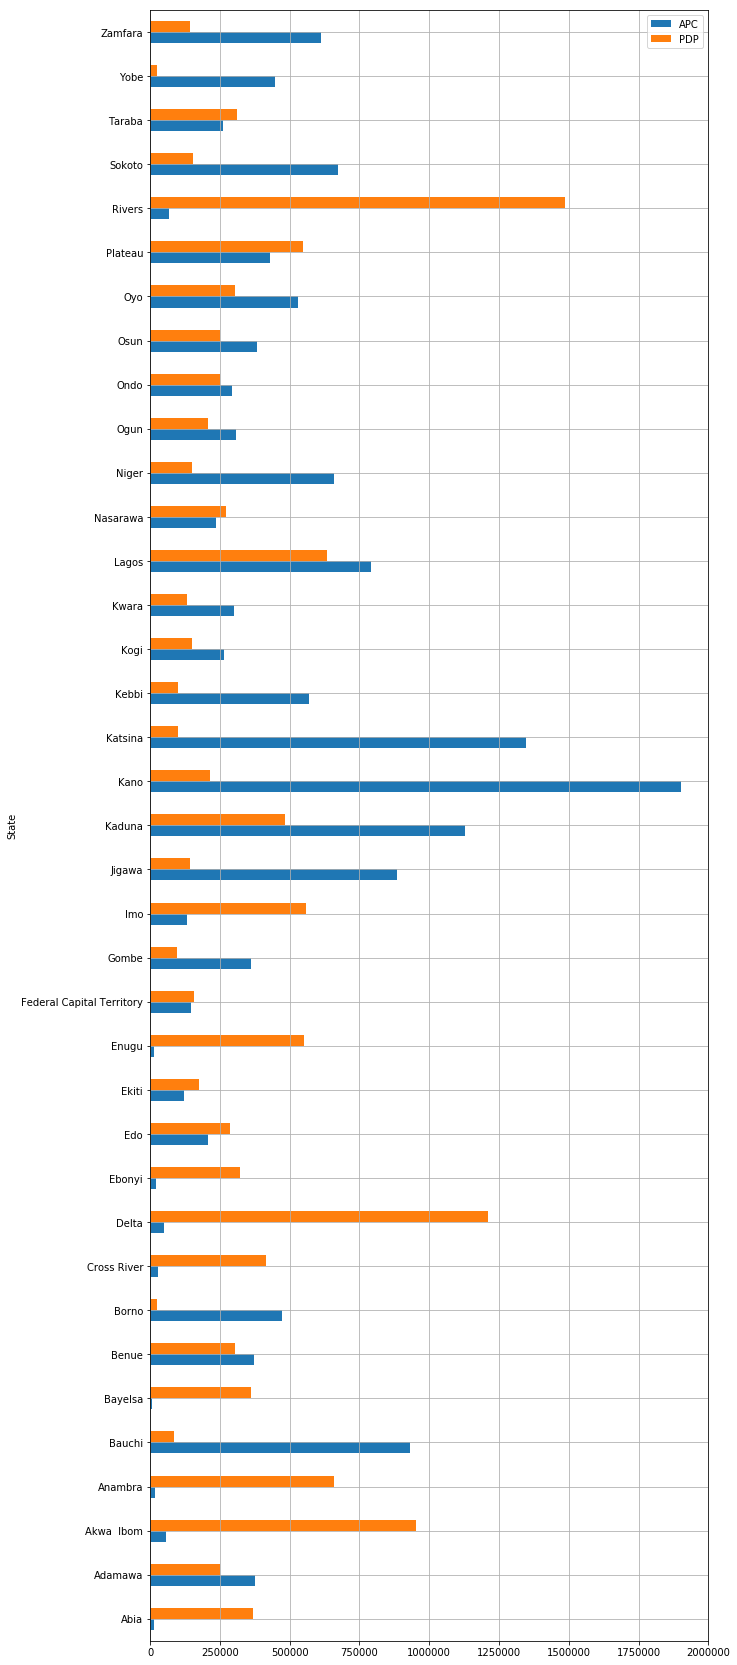

In [24]:
parties_data.plot(x='State', y=['APC', 'PDP'], kind='barh', figsize=(10, 30),  grid=1)

#### "APC" Margin_of_Victory_by_State'


Let's minus 'PDP' votes cast from 'APC* votes cast and divide by  the 'Total_Votes_Cast' for each state to see the 'Margin_of Victory_by_State'


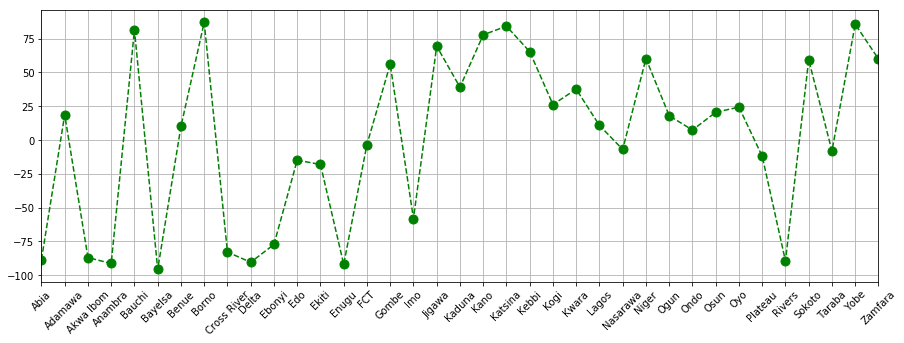

In [25]:

Margin_of_Victory_by_State = (parties_data['APC'] - parties_data['PDP']) / election['Total_Votes_Cast'] * 100


Margin_of_Victory_by_State.plot(kind='line', figsize=(15, 5), grid=1, linestyle='dashed', color='green', 
                marker='o', markersize=9)

plt.xticks(range(37), ['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue', 'Borno', 'Cross River',
                                         'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu', 'FCT', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano',
                                         'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger', 'Ogun', 'Ondo', 'Osun',
                                         'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba', 'Yobe', 'Zamfara'], rotation=45)

plt.show()


#### Parties with lowest votes


Let's see which parties have the lowest votes

In [26]:
low_votes_parties = parties_sum.sort_values()[:10]

low_votes_parties

HOPE     7435
UDP      9197
KOWA    13076
UPP     18120
AA      21825
NCP     24455
PPN     24475
ADC     29666
AD      31173
CPP     37300
dtype: int64

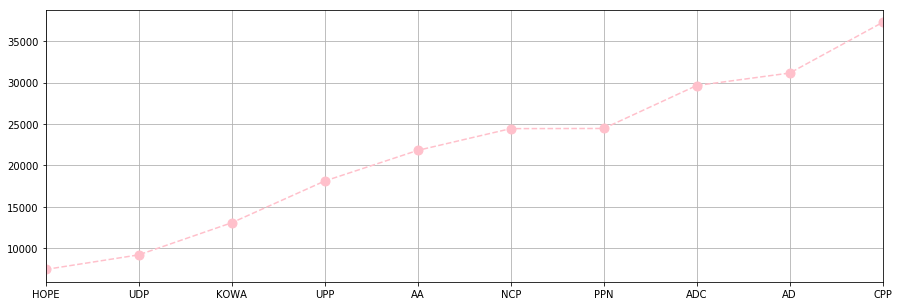

In [27]:
low_votes_parties.plot(kind='line', figsize=(15, 5),  grid=1, linestyle='dashed', color='pink', 
                       marker='o', markersize=9)

#### Hope Party

Let's check the state that voted most for the lowest rank party.

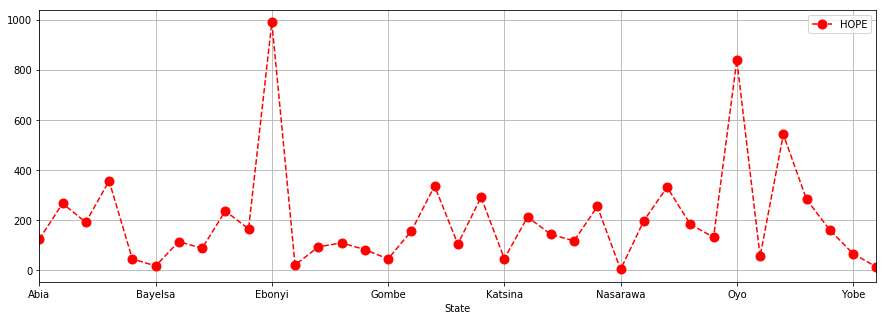

In [28]:
hope_party = parties_data[['State', 'HOPE']]

hope_party.plot(x='State', y='HOPE', kind='line', figsize=(15, 5),  grid=1, linestyle='dashed', color='red', 
                marker='o', markersize=9)

HOPE Party got most of its highest voted from Eboyi, Oyo and Rivers.